## Quiz 3. tips 데이터에서 팁을 많이 받으려면 어떤 데이터가 중요한지 인사이트를 찾아내세요
- 정답은 없습니다. 자유롭게 분석해보세요. 
- size는 식사 인원인것 같네요.
- 아래의 절차대로 Pandas를 이용하여 데이터를 분석해 보세요. (예시는 예시일 뿐입니다.)
    - 가설설정 : 예) 주중보다 주말에 팁을 많이 줄것이다
    - 분석과정설정 : 예) 주중 데이터와 주말데이터를 나눠 평균적 팁 금액의 데이터 프레임을 만든다.
    - 결과확인 : 예) 주말과 주중데이터의 평균 팁에는 큰 차이가 없으므로 가설이 틀렸다. 그러므로 다시 가설설정!
- 위의 가설을 여러개 세우셔서 어떤 데이터가 가장 팁에 대한 데이터에 영향을 많이 주는지 찾아보세요. (최소한 3개이상의 가설을 세워서 분석해보세요.)
- 지금까지 배운내용안에서 분석해보세요.
- 가설, 분석과정, 결과 확인에 대한 설명 주석을 달아주세요.
- 적당한 그래프를 그려주시면 더 좋습니다.
- 반별로 제가 판단해서 가장 잘하신 과제는 다른 분들께 공유하며 제가 스타벅스 커피 삽니다.^^

In [2]:
import seaborn as sns

In [3]:
tips_raw = sns.load_dataset("tips")

In [4]:
#Series의 형태
tips["total_bill"].tail()

NameError: name 'tips' is not defined

In [6]:
# Data
tips = tips_raw.copy()
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


#### 데이터 탐색

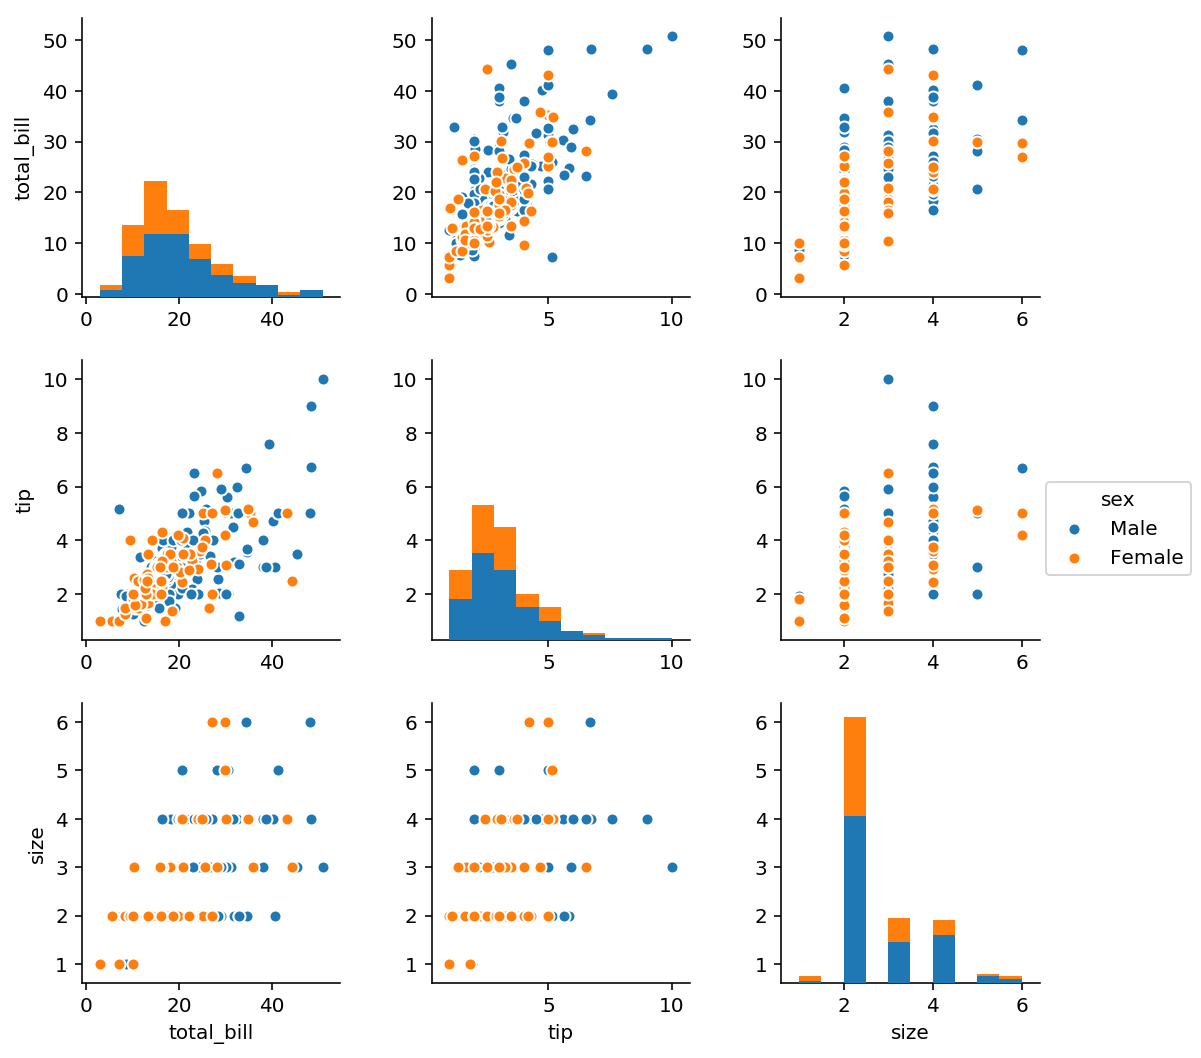

In [4]:
sns.pairplot(tips, hue = "sex")

#### 가설 1. 흡연과 팁이 관계가 있을까?

In [10]:
df = pd.DataFrame(tips, columns = ["smoker", "sex"])
df = tips.groupby(["smoker", "sex"]).size().reset_index(name = "count")
df

,smoker,sex,count
0,Yes,Male,60
1,Yes,Female,33
2,No,Male,97
3,No,Female,54


In [18]:
df = pd.DataFrame(tips, columns = ["smoker", "sex"])
df

,smoker,sex
0,No,Female
1,No,Male
2,No,Male
3,No,Male
4,No,Female
5,No,Male
6,No,Male
7,No,Male
8,No,Male
9,No,Male


In [16]:
df.pivot("smoker", "sex", "count")

sex,Male,Female
smoker,,
Yes,60,33
No,97,54


In [5]:
#남녀 흡연자 및 비흡연자 수 파악
try_1 = tips.pivot_table(index = "sex", columns = "smoker", aggfunc = 'size')
try_1

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [6]:
tips.groupby("sex").size()  

sex
Male      157
Female     87
dtype: int64

#### 손님의 수는 남성이 약 2배 정도로 더 많음. 
흡연자들 팁의 총합 vs 비흡연자들의 팁의 총합을 구해보자

In [7]:
# 원본데이터 보존을 위한 복사본 생성
smoker = tips_raw.copy()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [8]:
smoker_yes = smoker["smoker"] == "Yes"
smoker_yes = smoker[smoker_yes].reset_index(drop = True)
smoker_yes.tail()

,total_bill,tip,sex,smoker,day,time,size
88,15.53,3.00,Male,Yes,Sat,Dinner,2
89,12.60,1.00,Male,Yes,Sat,Dinner,2
90,32.83,1.17,Male,Yes,Sat,Dinner,2
91,27.18,2.00,Female,Yes,Sat,Dinner,2
92,22.67,2.00,Male,Yes,Sat,Dinner,2


In [9]:
#흡연자 중 남녀 별 팁의 총합
smoker_sex_tip= smoker_yes.pivot_table(values = "tip", index = "sex", columns = "smoker", aggfunc = np.sum)
smoker_sex_tip

smoker,Yes
sex,
Male,183.07
Female,96.74


In [10]:
# 흡연자 중 남녀 팁의 평균
result = pd.concat([smoker_sex_tip, try_1], axis = 1)
result.iloc[ : , 0] / result.iloc[ : , 1]

sex
Male      3.051167
Female    2.931515
Name: Yes, dtype: float64

#### 흡연자 중 남녀사이의 평균 팁 금액은 큰 차이가 없다.

#### 비흡연자들 중 남녀 평균 팁 금액 비교

In [11]:
# 원본데이터 보존을 위한 복사본 생성
non_smoker = tips_raw.copy()
non_smoker.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [12]:
find_non = non_smoker["smoker"] == "No"
non_smoker = non_smoker[find_non].reset_index(drop = True)
non_smoker.tail()

,total_bill,tip,sex,smoker,day,time,size
146,10.07,1.25,Male,No,Sat,Dinner,2
147,35.83,4.67,Female,No,Sat,Dinner,3
148,29.03,5.92,Male,No,Sat,Dinner,3
149,17.82,1.75,Male,No,Sat,Dinner,2
150,18.78,3.00,Female,No,Thur,Dinner,2


In [13]:
non_tip_sex = non_smoker.pivot_table(values = "tip", index = "sex", aggfunc = np.sum)

In [14]:
#비 흡연자 중 남녀 평균 팁 
result2 = pd.concat([non_tip_sex, try_1], axis = 1)
del result2["Yes"]
result2.iloc[ : , 0] / result.iloc[ : , 1]

sex
Male      5.033333
Female    4.538485
dtype: float64

#### - 평균 팁 금액은 비흡연자가 흡연자보다 남녀 모두 높다.
#### $ \therefore $ 비흡연자의 평균 팁 금액이 흡연자의 평균 팁 금액보다 높고, 그 차이는 2달러 이다.
#### 흡연자와 비흡연자의 남녀 평균 팁 금액 비교를 통해, 팁을 주는데 있어 성별은 큰 관여를 하지 않는다는 사실을 알 수 있다.

## 결론 1. 비흡연자는 흡연자보다 평균 2달러 정도의 팁을 더 준다.
## 결론 2. 성별은 팁 금액에 영향을 주지 않는다.

#### 가설 2. 식사 시간대와 팁이 영향이 있는가

In [19]:
# 원본데이터 보존을 위한 복사본 생성
time_size = tips_raw.copy()

#### time과 day에 따른 팁 금액 비교

In [20]:
time_size.pivot_table(values = "size", index = "day", columns = "time", aggfunc = np.sum)

time,Lunch,Dinner
day,,
Thur,150.0,2.0
Fri,14.0,26.0
Sat,NaN,219.0
Sun,NaN,216.0


## 결론 3. 식사 시간은 팁과 연관이 있다.
     - 토요일과 일요일에 점심 손님이 전혀 없고, 목요일은 점심손님이 많다.

가설 3.  식사인원과 팁의 상관관계

In [22]:
#  time 중 Thur, Fri, Sat, Sun만 추려 size별 팁 금액을 비교
Thur = time_size["day"] == "Thur"
Thur = time_size[Thur].reset_index(drop = True)
Fri = time_size["day"] == "Fri"
Fri = time_size[Fri].reset_index(drop = True)
Sat = time_size["day"] == "Sat"
Sat = time_size[Sat].reset_index(drop = True)
Sun = time_size["day"] == "Sun"
Sun = time_size[Sun].reset_index(drop = True)

Thur.tail()


,total_bill,tip,sex,smoker,day,time,size
57,13.00,2.00,Female,Yes,Thur,Lunch,2
58,16.40,2.50,Female,Yes,Thur,Lunch,2
59,20.53,4.00,Male,Yes,Thur,Lunch,4
60,16.47,3.23,Female,Yes,Thur,Lunch,3
61,18.78,3.00,Female,No,Thur,Dinner,2


In [18]:
Thur_tip_sum = Thur.pivot_table(values = "tip", index = "size", aggfunc = np.sum )
Thur_tip_average = Thur.pivot_table(values = "tip", index = "size" )

Fri_tip_sum = Fri.pivot_table(values = "tip", index = "size", aggfunc = np.sum )
Fri_tip_average = Fri.pivot_table(values = "tip", index = "size" )

Sat_tip_sum = Sat.pivot_table(values = "tip", index = "size", aggfunc = np.sum )
Sat_tip_average = Sat.pivot_table(values = "tip", index = "size" )

Sun_tip_sum = Sun.pivot_table(values = "tip", index = "size", aggfunc = np.sum )
Sun_tip_average = Sun.pivot_table(values = "tip", index = "size" )

In [19]:
tip_sum_per_day = pd.concat([Thur_tip_sum, Fri_tip_sum, Sat_tip_sum, Sun_tip_sum], axis = 1)
tip_sum_per_day.columns = ["Thur", "Fri", "Sat", "Sun"]
tip_sum_per_day

,Thur,Fri,Sat,Sun
size,,,,
1,1.83,1.92,2.00,NaN
2,117.24,42.31,133.43,109.86
3,10.77,3.00,68.36,46.81
4,21.09,4.73,53.61,73.58
5,5.00,NaN,3.00,12.14
6,15.90,NaN,NaN,5.00


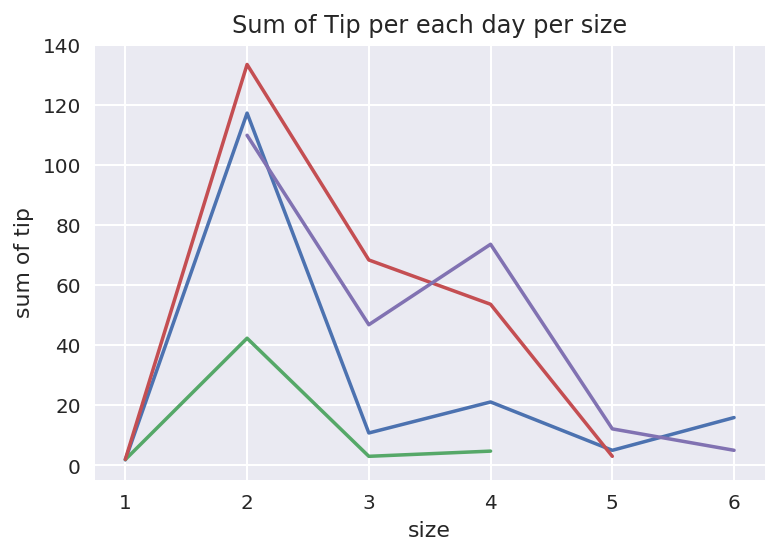

In [20]:
sns.set()
plt.title("Sum of Tip per each day per size")
plt.plot(tip_sum_per_day)
plt.xlabel("size")
plt.ylabel("sum of tip")
plt.legend(loc = 0)
plt.show()

#### $ \therefore $ 팁의 총 합은 목,금,토,일 모두 2명씩 온 테이블에서 가장 높다. 

In [21]:
time_size.groupby("size").size().reset_index(name = "counts")

,size,counts
0,1,4
1,2,156
2,3,38
3,4,37
4,5,5
5,6,4


실제로 2인 손님들이 많이 왔으므로 평균을 비교해볼 필요가 있다.

In [22]:
tip_average_per_day = pd.concat([Thur_tip_average, Fri_tip_average, Sat_tip_average, Sun_tip_average], axis = 1)
tip_average_per_day.columns = ["Thur", "Fri", "Sat", "Sun"]
tip_average_per_day = round(tip_average_per_day, 2)
tip_average_per_day

,Thur,Fri,Sat,Sun
size,,,,
1,1.83,1.92,1.00,NaN
2,2.44,2.64,2.52,2.82
3,2.69,3.00,3.80,3.12
4,4.22,4.73,4.12,4.09
5,5.00,NaN,3.00,4.05
6,5.30,NaN,NaN,5.00


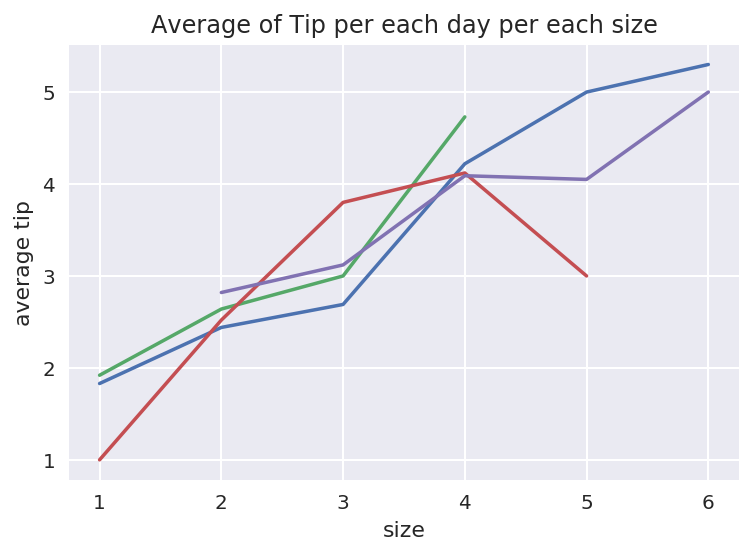

In [23]:
# 요일별 평균 팁 금액
sns.set()
plt.title("Average of Tip per each day per each size")
plt.plot(tip_average_per_day)
plt.xlabel("size")
plt.ylabel("average tip")
plt.legend(loc = 0)
plt.show()

- $ \therefore $ 평균팁의 경우, 토요일을 제외하곤 목, 금, 일 모두 size가 증가할 수록 팁의 금액이 높아지는 경향

## 결론 4. 식사 인원은 팁과 연관이 있다.
    - 식사인원이 2명일 때 팁의 총합이 제일 높고, 식사인원이 많을 수록, 팁의 평균이 커진다.

In [24]:
# 원본데이터 보존을 위한 복사본 생성
total_and_tip = tips_raw.copy()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


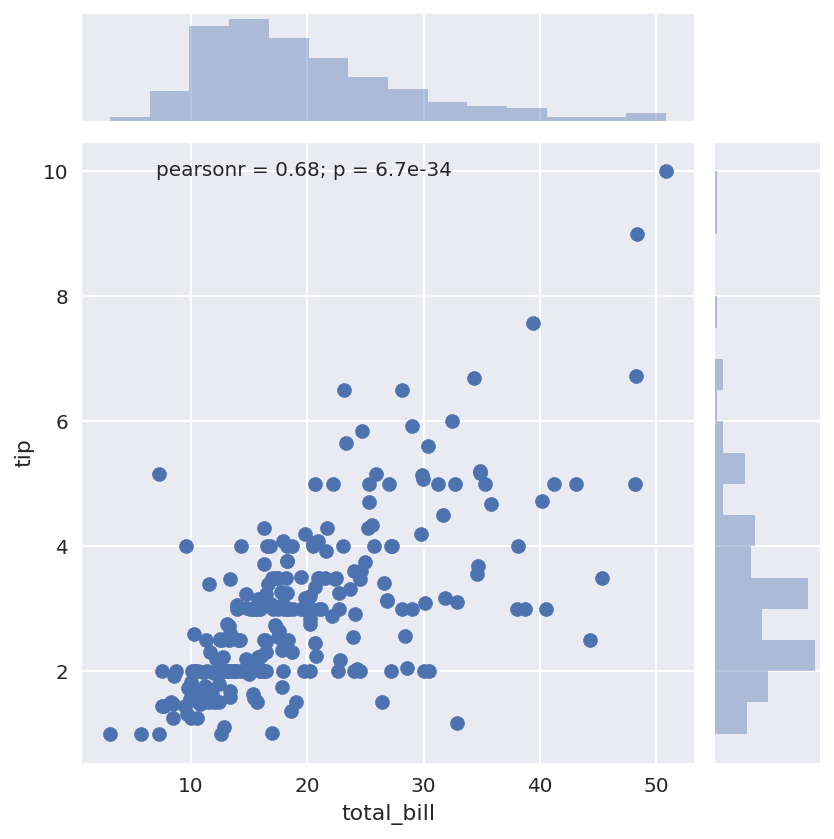

In [25]:
total_and_tip = total_and_tip.drop(total_and_tip.columns[2 : 7], axis = 1)
total_and_tip.tail()
sns.jointplot(x = "total_bill", y = "tip", data = total_and_tip)
plt.show()


#### $ \therefore $ 총 지출 금액이 높을수록 팁의 양이 높아지는 경향이 있음. 

## 결론 4. 총 지출 금액은 팁과 연관이 있다.

# 최종 결론
1. 6가지 항목 중 가장 큰 영향을 미치는 것은 식사 인원이며, 식사인원수가 많을 수록 팁 금액이 높다.
2. 많은 손님들이 목요일 점심, 주말 저녁에 집중되어 방문한다.
3. 성별과 흡연은 팁의 양에 큰 영향을 미치지 않든다.